In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.listdir('../input/heart-failure-clinical-data')

['heart_failure_clinical_records_dataset.csv']

In [3]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [12]:
data = data.astype({"anaemia":'float', "creatinine_phosphokinase":'float',"ejection_fraction":'float',"serum_sodium":'float',"time":'float'}) 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 30.5 KB


In [14]:
! pip install pycaret

     |████████████████████████████████| 249 kB 1.2 MB/s eta 0:00:01


     |████████████████████████████████| 14.1 MB 10.9 MB/s eta 0:00:01   |██████▏                         | 2.7 MB 4.7 MB/s eta 0:00:03
     |████████████████████████████████| 1.1 MB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 339 kB 28.9 MB/s eta 0:00:01
     |████████████████████████████████| 125 kB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 85 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 2.0 MB/s  eta 0:00:01


     |████████████████████████████████| 77 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 3.5 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 27.0 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=77d9047e83e87947638519f49395efaf6c25e3653363c60ec8aae7f1de9e5613
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.1-py3-none-any.whl size=100577 sha256=4a60fb12051448bd53c618034c9784f0b0e9b6f4e6241c5a0706821ef2989240
  Stored in directory: /root/.cache/pip/wheels/7f/d9/25/baefac3eda0e7dbf143008d2b9865e0d923d4b7306136244fe
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17158 sha256=9125494da287814a6d2607957e0e60ab501c76dee3296eedf0eb27b40a629ef4
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a

In [15]:
import pycaret
from pycaret.classification import *

In [16]:
clf = setup(data = data,target = 'DEATH_EVENT',numeric_imputation = 'mean')

,Description,Value
0,session_id,7199
1,Target,DEATH_EVENT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8521,0.0000,0.6619,0.8017,0.7217,0.6231,0.6306,0.0140
lda,Linear Discriminant Analysis,0.8474,0.8654,0.6619,0.7917,0.7179,0.6145,0.6213,0.0190
rf,Random Forest Classifier,0.8279,0.9107,0.6810,0.7317,0.6975,0.5787,0.5855,0.3130
catboost,CatBoost Classifier,0.8279,0.9087,0.6357,0.7521,0.6826,0.5677,0.5753,0.9250
lightgbm,Light Gradient Boosting Machine,0.8233,0.8964,0.7000,0.6992,0.6889,0.5687,0.5765,0.0290
lr,Logistic Regression,0.8229,0.8567,0.6024,0.7698,0.6702,0.5519,0.5630,0.3440
nb,Naive Bayes,0.8183,0.8362,0.5548,0.7996,0.6315,0.5223,0.5501,0.0150
ada,Ada Boost Classifier,0.8090,0.8347,0.6619,0.6867,0.6590,0.5287,0.5402,0.0580
gbc,Gradient Boosting Classifier,0.8086,0.8740,0.6357,0.7043,0.6598,0.5290,0.5352,0.0630
et,Extra Trees Classifier,0.8043,0.8782,0.5238,0.7424,0.6035,0.4838,0.5014,0.2810


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=7199,
                solver='auto', tol=0.001)

In [18]:
rf  = create_model('rf')     

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9778,0.6667,1.0000,0.8000,0.7407,0.7670
1,0.8571,0.9111,0.6667,0.8000,0.7273,0.6316,0.6364
2,0.7619,0.8333,0.5000,0.6000,0.5455,0.3860,0.3889
3,0.8095,0.9333,0.8333,0.6250,0.7143,0.5758,0.5892
4,0.8571,0.9222,0.6667,0.8000,0.7273,0.6316,0.6364
5,0.8095,0.8778,0.6667,0.6667,0.6667,0.5333,0.5333
6,0.6190,0.7755,0.2857,0.4000,0.3333,0.0769,0.0791
7,0.9524,0.9898,1.0000,0.8750,0.9333,0.8966,0.9014
8,0.8571,0.9337,0.8571,0.7500,0.8000,0.6897,0.6934
9,0.8500,0.9524,0.6667,0.8000,0.7273,0.6250,0.6299


In [20]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9524,0.9778,0.8333,1.0000,0.9091,0.8772,0.8839
1,0.8571,0.9111,0.8333,0.7143,0.7692,0.6667,0.6708
2,0.8095,0.7667,0.6667,0.6667,0.6667,0.5333,0.5333
3,0.8571,0.9778,1.0000,0.6667,0.8000,0.6957,0.7303
4,0.8095,0.9333,0.8333,0.6250,0.7143,0.5758,0.5892
5,0.8095,0.8556,0.6667,0.6667,0.6667,0.5333,0.5333
6,0.7143,0.8367,0.4286,0.6000,0.5000,0.3077,0.3162
7,0.9048,1.0000,1.0000,0.7778,0.8750,0.8000,0.8165
8,0.9048,0.9796,1.0000,0.7778,0.8750,0.8000,0.8165
9,0.9000,0.9524,1.0000,0.7500,0.8571,0.7826,0.8018


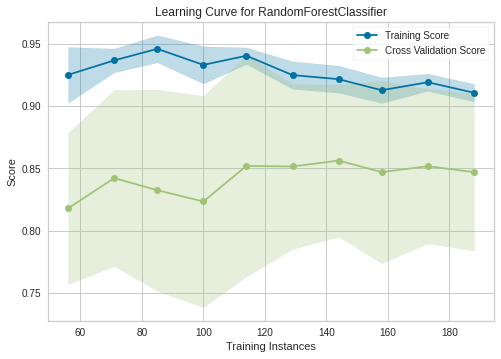

In [21]:
plot_model(estimator = tuned_rf, plot = 'learning')

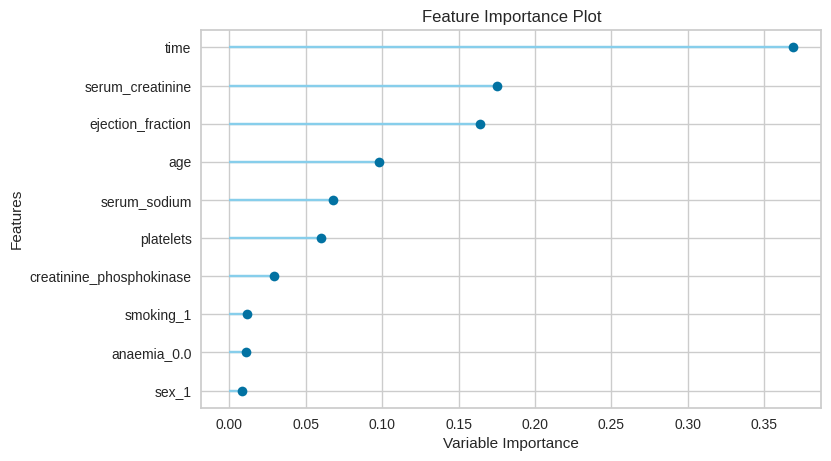

In [22]:
plot_model(estimator = tuned_rf, plot = 'feature')

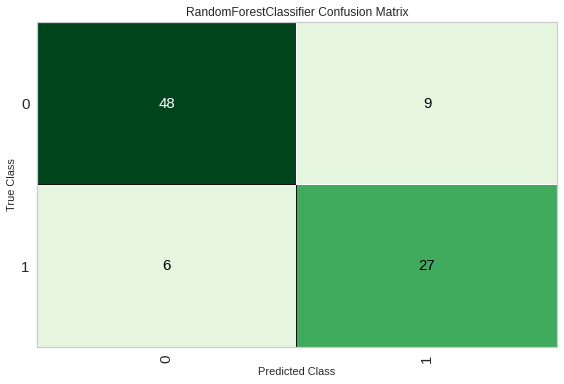

In [23]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

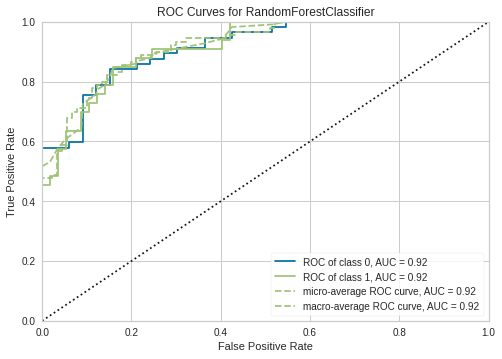

In [24]:
plot_model(estimator = tuned_rf, plot = 'auc')

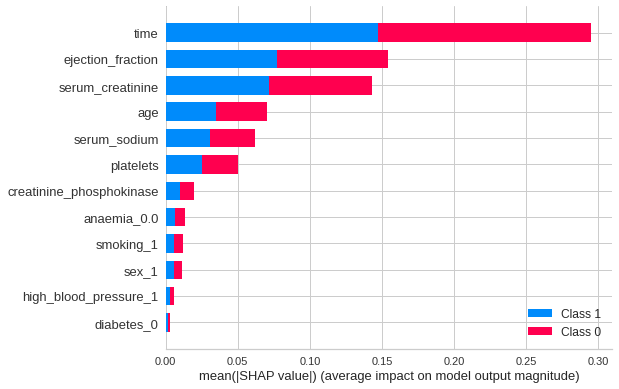

In [25]:
interpret_model(tuned_rf)

In [26]:
save_model(tuned_rf, 'heartmodel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='DEATH_EVENT', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features=

# 2) Ridge Classifier

In [30]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.0000,0.5000,0.7500,0.6000,0.4815,0.4985
1,0.8571,0.0000,0.6667,0.8000,0.7273,0.6316,0.6364
2,0.7619,0.0000,0.5000,0.6000,0.5455,0.3860,0.3889
3,0.9048,0.0000,0.6667,1.0000,0.8000,0.7407,0.7670
4,0.7619,0.0000,0.5000,0.6000,0.5455,0.3860,0.3889
5,0.8095,0.0000,0.6667,0.6667,0.6667,0.5333,0.5333
6,0.7143,0.0000,0.4286,0.6000,0.5000,0.3077,0.3162
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9524,0.0000,0.8571,1.0000,0.9231,0.8889,0.8944
9,0.9500,0.0000,0.8333,1.0000,0.9091,0.8750,0.8819


In [31]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.0000,0.5000,0.7500,0.6000,0.4815,0.4985
1,0.8571,0.0000,0.6667,0.8000,0.7273,0.6316,0.6364
2,0.7619,0.0000,0.5000,0.6000,0.5455,0.3860,0.3889
3,0.9048,0.0000,0.6667,1.0000,0.8000,0.7407,0.7670
4,0.7619,0.0000,0.5000,0.6000,0.5455,0.3860,0.3889
5,0.8095,0.0000,0.6667,0.6667,0.6667,0.5333,0.5333
6,0.7143,0.0000,0.4286,0.6000,0.5000,0.3077,0.3162
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9524,0.0000,0.8571,1.0000,0.9231,0.8889,0.8944
9,0.9500,0.0000,0.8333,1.0000,0.9091,0.8750,0.8819


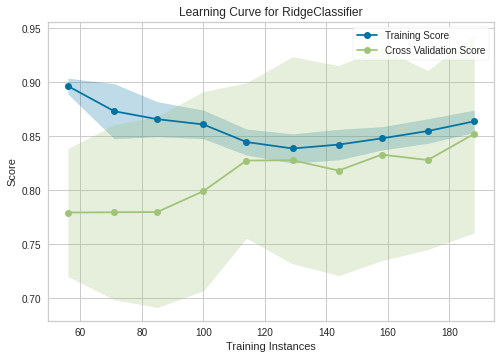

In [32]:
plot_model(estimator = tuned_ridge, plot = 'learning')

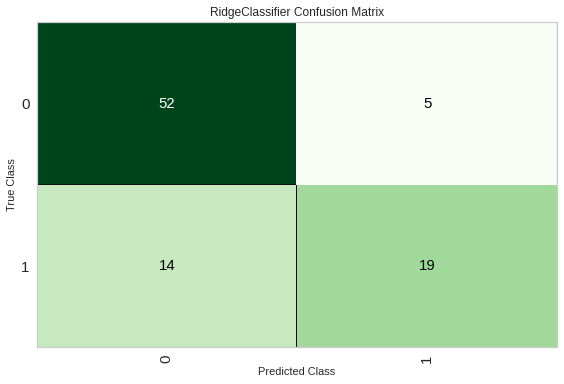

In [33]:
plot_model(estimator = tuned_ridge, plot = 'confusion_matrix')

# 3) XGBoost

In [34]:
xgb   = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9778,0.6667,1.0000,0.8000,0.7407,0.7670
1,0.8095,0.8778,0.6667,0.6667,0.6667,0.5333,0.5333
2,0.7619,0.7667,0.5000,0.6000,0.5455,0.3860,0.3889
3,0.7143,0.8444,0.6667,0.5000,0.5714,0.3636,0.3721
4,0.8095,0.9556,0.6667,0.6667,0.6667,0.5333,0.5333
5,0.8095,0.8778,0.6667,0.6667,0.6667,0.5333,0.5333
6,0.6667,0.7857,0.2857,0.5000,0.3636,0.1600,0.1715
7,0.8571,0.9592,0.8571,0.7500,0.8000,0.6897,0.6934
8,0.9048,0.9184,0.8571,0.8571,0.8571,0.7857,0.7857
9,0.7500,0.9048,0.6667,0.5714,0.6154,0.4318,0.4346


In [35]:
tuned_xgb = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.9556,0.3333,1.0000,0.5000,0.4167,0.5130
1,0.8571,0.9111,0.6667,0.8000,0.7273,0.6316,0.6364
2,0.8095,0.7333,0.5000,0.7500,0.6000,0.4815,0.4985
3,0.9524,0.9667,0.8333,1.0000,0.9091,0.8772,0.8839
4,0.8571,0.9000,0.6667,0.8000,0.7273,0.6316,0.6364
5,0.6667,0.7667,0.6667,0.4444,0.5333,0.2899,0.3043
6,0.7143,0.7041,0.2857,0.6667,0.4000,0.2500,0.2887
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9524,1.0000,1.0000,0.8750,0.9333,0.8966,0.9014
9,0.8500,0.9405,0.6667,0.8000,0.7273,0.6250,0.6299


In [ ]:
plot_model(estimator = tuned_xgb, plot = 'learning')

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
plot_model(estimator = tuned_xgb, plot = 'confusion_matrix')